In [21]:
# Time Series analysis based from this tutorial:
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne
# Thanks for Jason Brownlee

In [22]:
import pandas as pd
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
input_csv = '../datasets/port_monthly/Kennedy International Airport FullDataset.csv'
input_csv1 = '../datasets/port_monthly/Kennedy International Airport TrainTest.csv'
input_csv2 = '../datasets/port_monthly/Kennedy International Airport Validation.csv'
input_stationary_csv = '../datasets/port_monthly/Kennedy International Airport Stationary.csv'

df = pd.read_csv(input_csv, header=0, index_col=0, parse_dates=True, squeeze=True)
df

2002-01
2002-02-01    301327.0
2002-03-01    367110.0
2002-04-01    355947.0
2002-05-01    370167.0
2002-06-01    426258.0
                ...   
2016-05-01    352086.0
2016-06-01    375360.0
2016-07-01    425571.0
2016-08-01    423183.0
2016-09-01    346183.0
Name: 349019.0, Length: 176, dtype: float64

In [33]:
df.describe()

count       176.000000
mean     373771.448864
std       59510.596962
min      257780.000000
25%      333994.750000
50%      360282.500000
75%      414505.500000
max      575492.000000
Name: 349019.0, dtype: float64

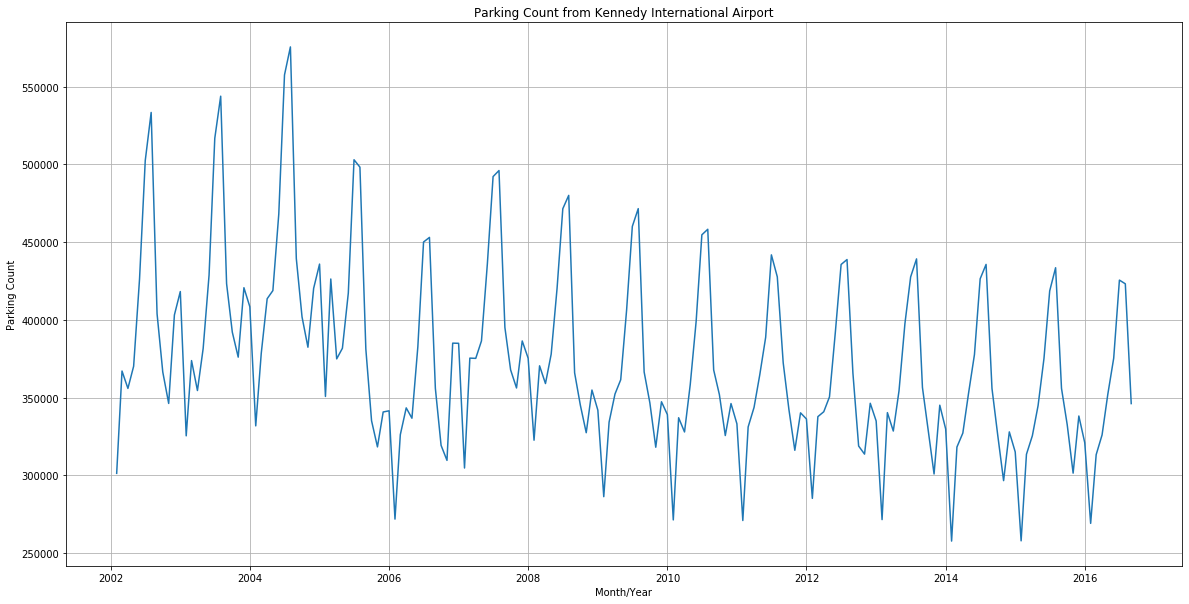

In [24]:
fig, ax = plt.subplots()
ax.plot(df)

ax.set(xlabel='Month/Year', ylabel='Parking Count',
       title='Parking Count from Kennedy International Airport')
ax.grid()

plt.show()

In [25]:
# prepare data
X = df.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [29]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=361505.000, Expected=406380
>Predicted=406380.000, Expected=460103
>Predicted=460103.000, Expected=471519
>Predicted=471519.000, Expected=366512
>Predicted=366512.000, Expected=346661
>Predicted=346661.000, Expected=318126
>Predicted=318126.000, Expected=347352
>Predicted=347352.000, Expected=339114
>Predicted=339114.000, Expected=271392
>Predicted=271392.000, Expected=337086
>Predicted=337086.000, Expected=327943
>Predicted=327943.000, Expected=358404
>Predicted=358404.000, Expected=399066
>Predicted=399066.000, Expected=454695
>Predicted=454695.000, Expected=458248
>Predicted=458248.000, Expected=367810
>Predicted=367810.000, Expected=351967
>Predicted=351967.000, Expected=325644
>Predicted=325644.000, Expected=346203
>Predicted=346203.000, Expected=333166
>Predicted=333166.000, Expected=271014
>Predicted=271014.000, Expected=331169
>Predicted=331169.000, Expected=343751
>Predicted=343751.000, Expected=364680
>Predicted=364680.000, Expected=388817
>Predicted=388817.000, Ex

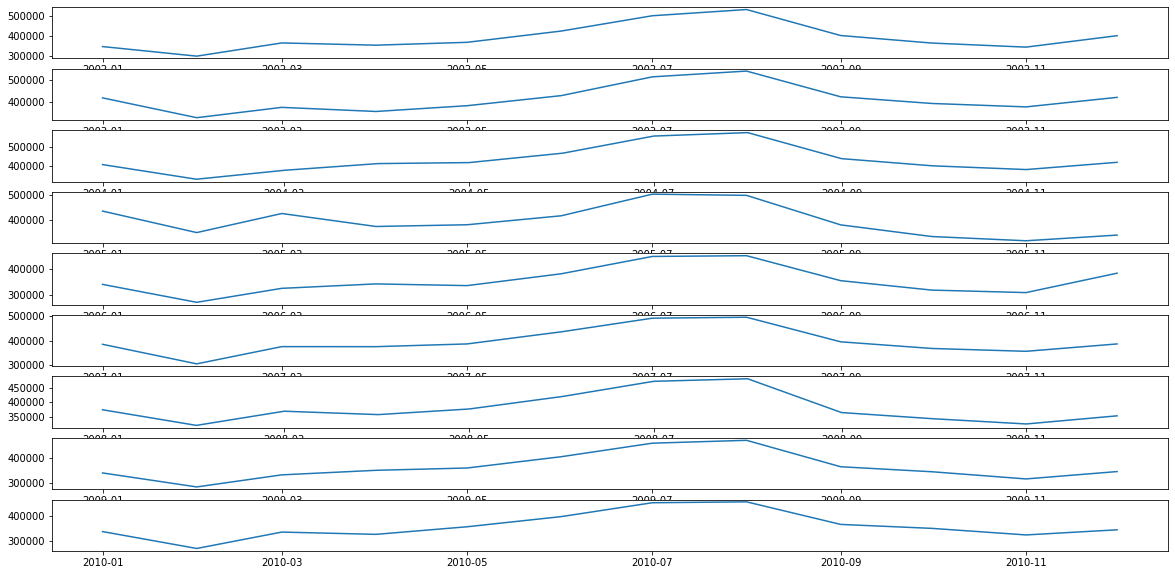

In [50]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

series = read_csv(input_csv, header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['2002':'2010'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

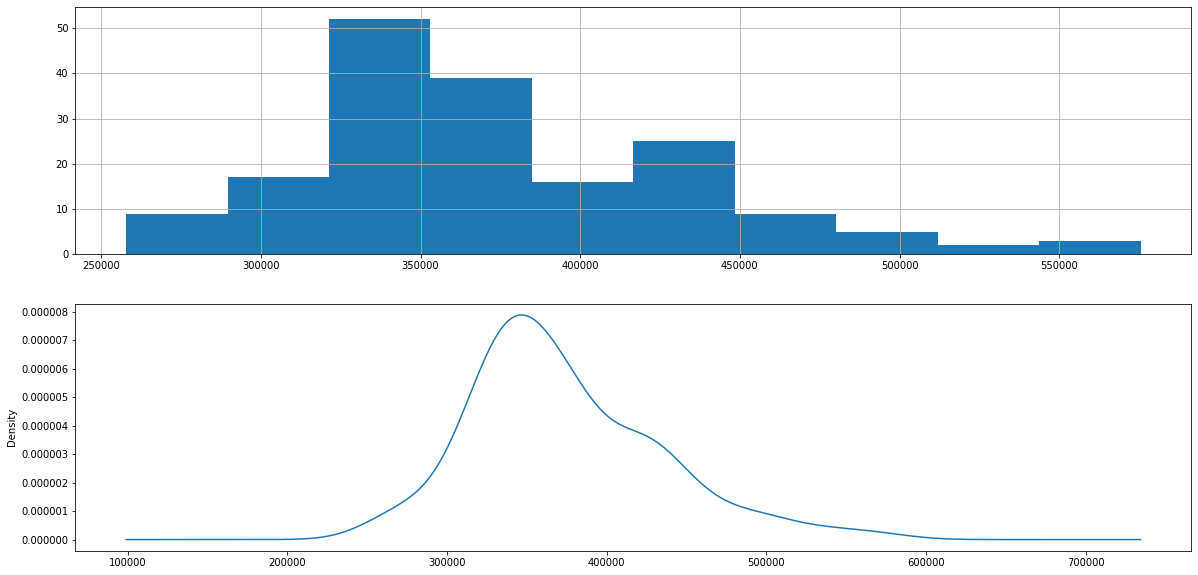

In [57]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv(input_csv, header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

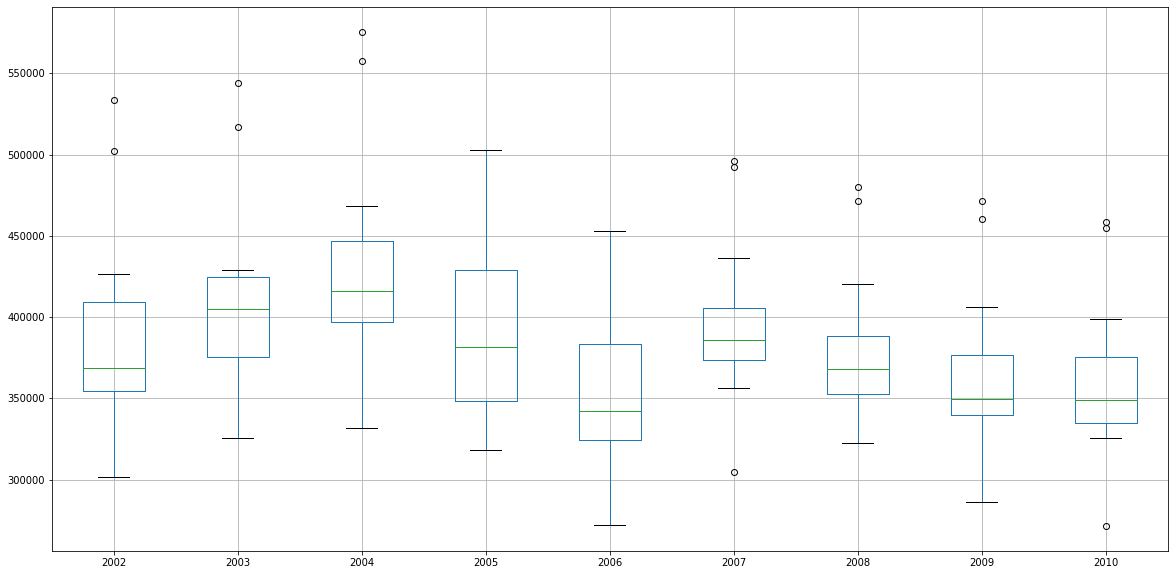

In [60]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv(input_csv, header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['2002':'2010'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

ADF Statistic: -4.110946
p-value: 0.000929
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577


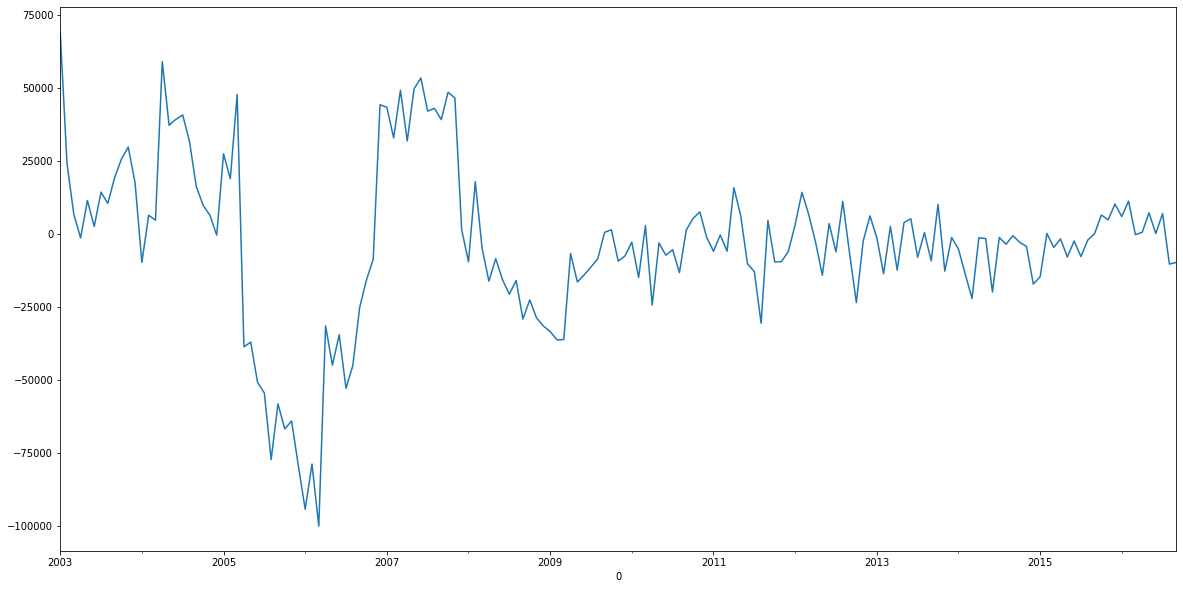

In [61]:
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
series = read_csv(input_csv, header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv(input_stationary_csv, header=False)
# plot
stationary.plot()
pyplot.show()

In [62]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

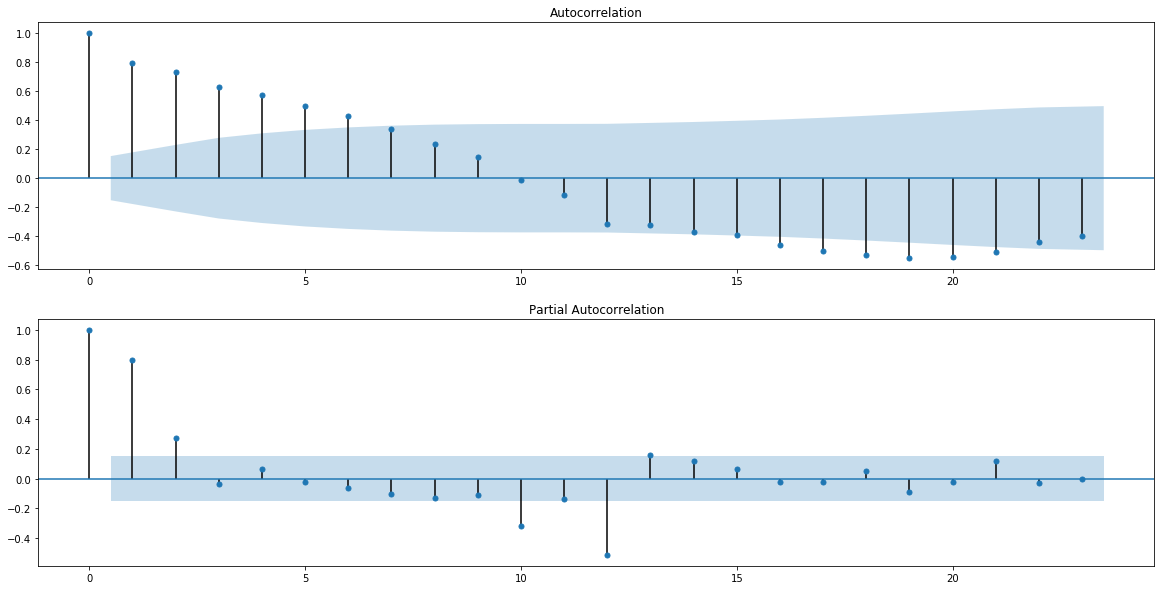

In [65]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv(input_stationary_csv, header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [72]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load data
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)
series = series[0:156]

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)


>Predicted=478577.784, Expected=471450
>Predicted=475453.321, Expected=480045
>Predicted=378104.853, Expected=365967
>Predicted=342028.765, Expected=345239
>Predicted=330684.393, Expected=327457
>Predicted=360324.581, Expected=354895
>Predicted=343278.187, Expected=341941
>Predicted=289854.466, Expected=286336
>Predicted=334501.785, Expected=334271
>Predicted=322693.327, Expected=352347
>Predicted=364958.585, Expected=361505
>Predicted=408913.686, Expected=406380
>Predicted=454697.507, Expected=460103
>Predicted=469264.148, Expected=471519
>Predicted=356570.050, Expected=366512
>Predicted=344168.897, Expected=346661
>Predicted=329384.122, Expected=318126
>Predicted=347685.376, Expected=347352
>Predicted=333089.116, Expected=339114
>Predicted=283050.216, Expected=271392
>Predicted=322185.500, Expected=337086
>Predicted=349947.698, Expected=327943
>Predicted=345745.129, Expected=358404
>Predicted=394447.484, Expected=399066
>Predicted=457269.871, Expected=454695
>Predicted=463920.893, Ex

In [74]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)
series = series[0:156]

# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
#evaluate_models(series.values, p_values, d_values, q_values)
#Best ARIMA(2, 0, 0) RMSE=11000.761

ARIMA(0, 0, 1) RMSE=12929.620
ARIMA(0, 0, 2) RMSE=13018.072
ARIMA(0, 0, 3) RMSE=11913.291
ARIMA(0, 0, 4) RMSE=12068.171
ARIMA(0, 0, 5) RMSE=13249.627
ARIMA(0, 0, 6) RMSE=11979.797
ARIMA(0, 1, 1) RMSE=11379.622
ARIMA(0, 1, 2) RMSE=11499.443
ARIMA(0, 1, 3) RMSE=11483.867
ARIMA(0, 1, 4) RMSE=11472.966
ARIMA(0, 1, 5) RMSE=11525.574
ARIMA(0, 1, 6) RMSE=13208.565
ARIMA(0, 2, 1) RMSE=12630.039
ARIMA(0, 2, 2) RMSE=11483.389
ARIMA(0, 2, 3) RMSE=11624.272
ARIMA(0, 2, 4) RMSE=13181.037
ARIMA(0, 2, 5) RMSE=13192.304
ARIMA(0, 2, 6) RMSE=13310.165
ARIMA(1, 0, 0) RMSE=11791.047
ARIMA(1, 0, 1) RMSE=11109.418
ARIMA(1, 0, 2) RMSE=11254.503
ARIMA(1, 0, 3) RMSE=11229.998
ARIMA(1, 0, 4) RMSE=11213.771
ARIMA(1, 0, 5) RMSE=11847.909
ARIMA(1, 0, 6) RMSE=12611.014
ARIMA(1, 1, 0) RMSE=11344.708
ARIMA(1, 1, 1) RMSE=11574.801
ARIMA(1, 2, 0) RMSE=15789.285
ARIMA(1, 2, 1) RMSE=11433.012
ARIMA(1, 2, 3) RMSE=11688.846
ARIMA(1, 2, 4) RMSE=12577.976
ARIMA(1, 2, 5) RMSE=12832.453
ARIMA(1, 2, 6) RMSE=13211.184
ARIMA(2, 0

C:\Users\lrmen\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMSE: 10669.330
                  0
count     83.000000
mean    -434.829796
std    10725.271115
min   -23191.910128
25%    -7350.490019
50%    -1410.983874
75%     5308.110144
max    27783.486794


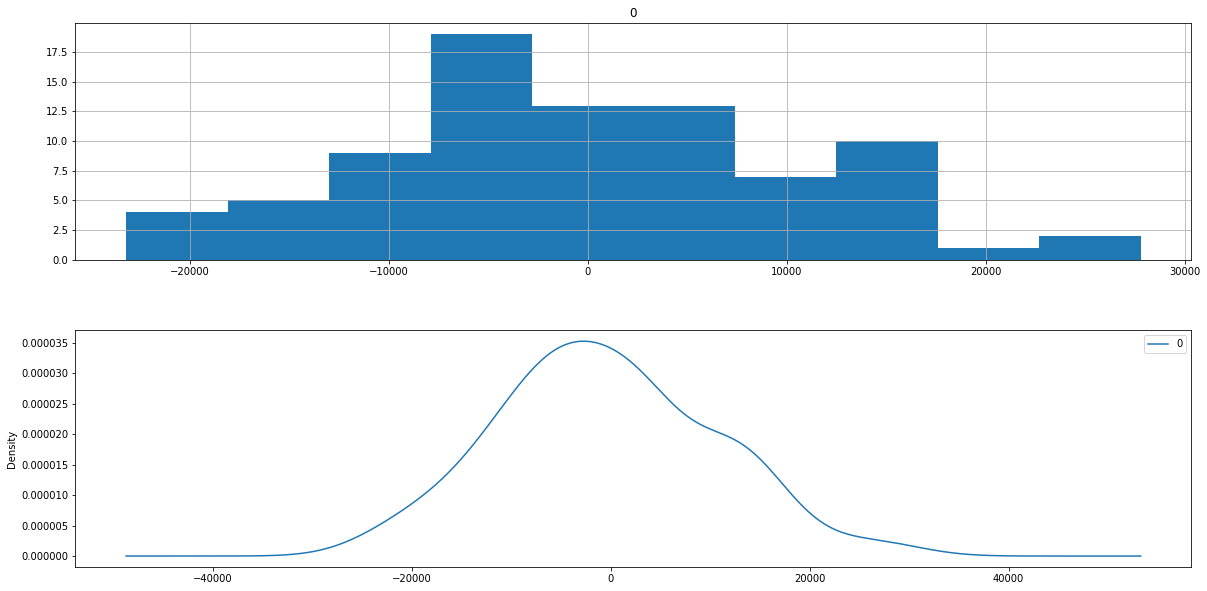

In [9]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load data
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(2,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
    
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

C:\Users\lrmen\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMSE: 10660.465
                  0
count  8.300000e+01
mean  -3.836292e-07
std    1.072527e+04
min   -2.275708e+04
25%   -6.915660e+03
50%   -9.761541e+02
75%    5.742940e+03
max    2.821832e+04


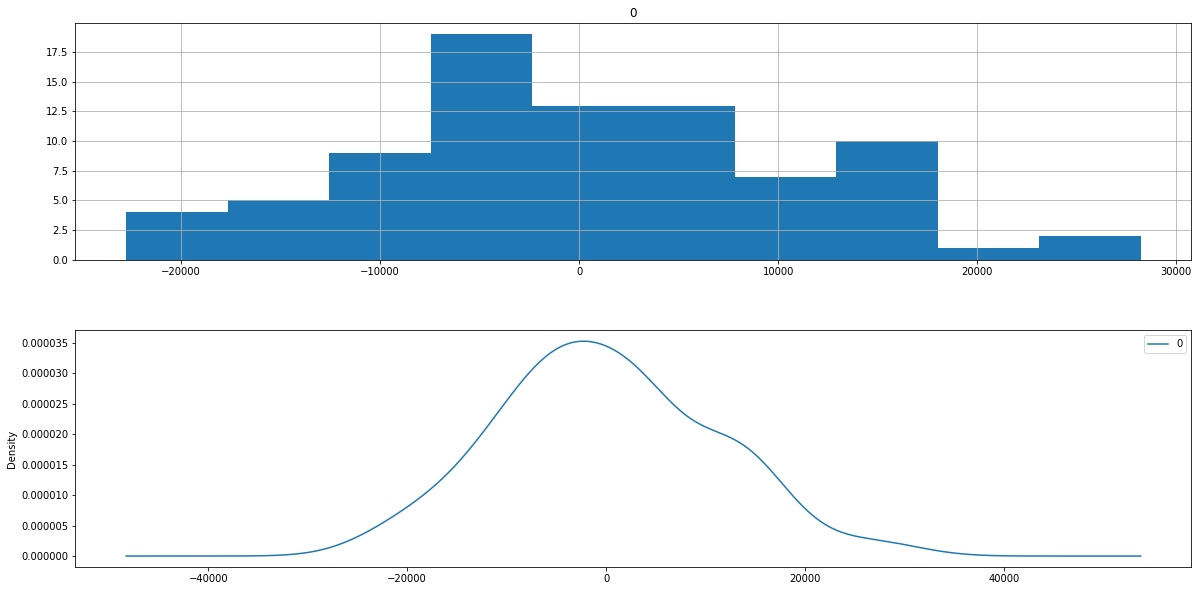

In [14]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load data
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -434.829796

for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(2,0,0))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

                  0
count     83.000000
mean   -4075.726904
std    11605.246817
min   -31117.450597
25%   -12084.808852
50%    -3306.680233
75%     3587.669440
max    19649.390567


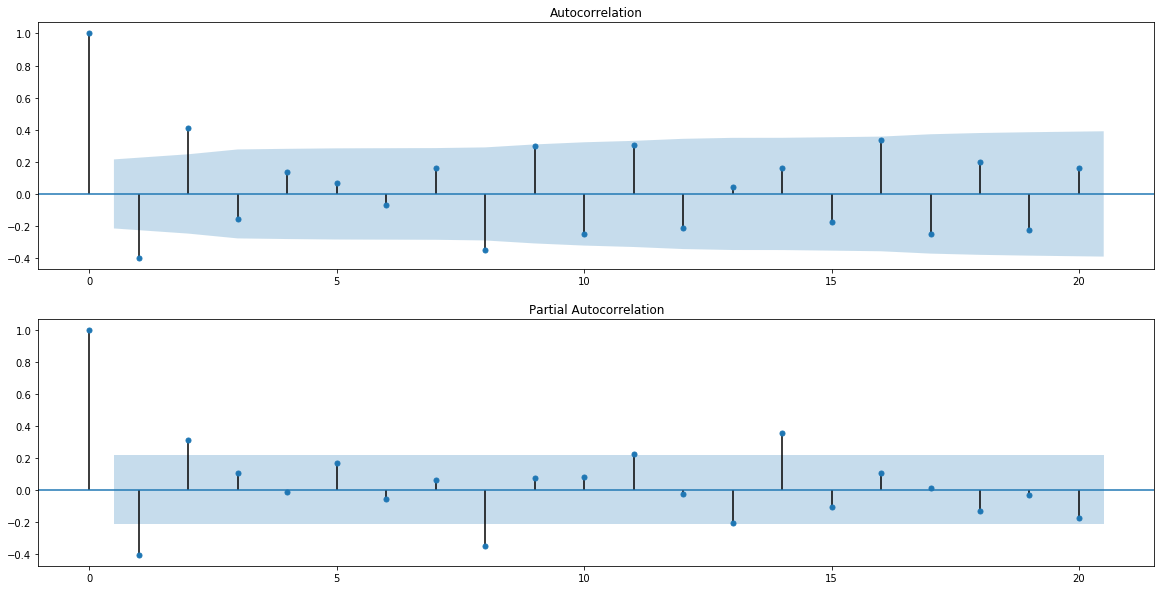

In [15]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [17]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# load data
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')

# difference data
months_in_year = 12
diff = difference(X, months_in_year)

# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = -434.829796
# save model
model_fit.save('model_arima.pkl')
numpy.save('model_arima_bias.npy', [bias])

print("Done!")

Done!


In [18]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('model_arima.pkl')
bias = numpy.load('model_arima_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 324701.157


>Predicted=324701.157, Expected=332576
>Predicted=300395.383, Expected=301477 - Diff=0.36 %
>Predicted=327912.621, Expected=338196 - Diff=3.14 %
>Predicted=320211.946, Expected=321060 - Diff=0.26 %
>Predicted=257740.186, Expected=269176 - Diff=4.44 %
>Predicted=319329.468, Expected=313331 - Diff=1.88 %
>Predicted=321462.862, Expected=326042 - Diff=1.42 %
>Predicted=346763.813, Expected=352086 - Diff=1.53 %
>Predicted=377537.551, Expected=375360 - Diff=0.58 %
>Predicted=416713.573, Expected=425571 - Diff=2.13 %
>Predicted=437821.318, Expected=423183 - Diff=3.34 %
>Predicted=347086.083, Expected=346183 - Diff=0.26 %
RMSE: 7549.809


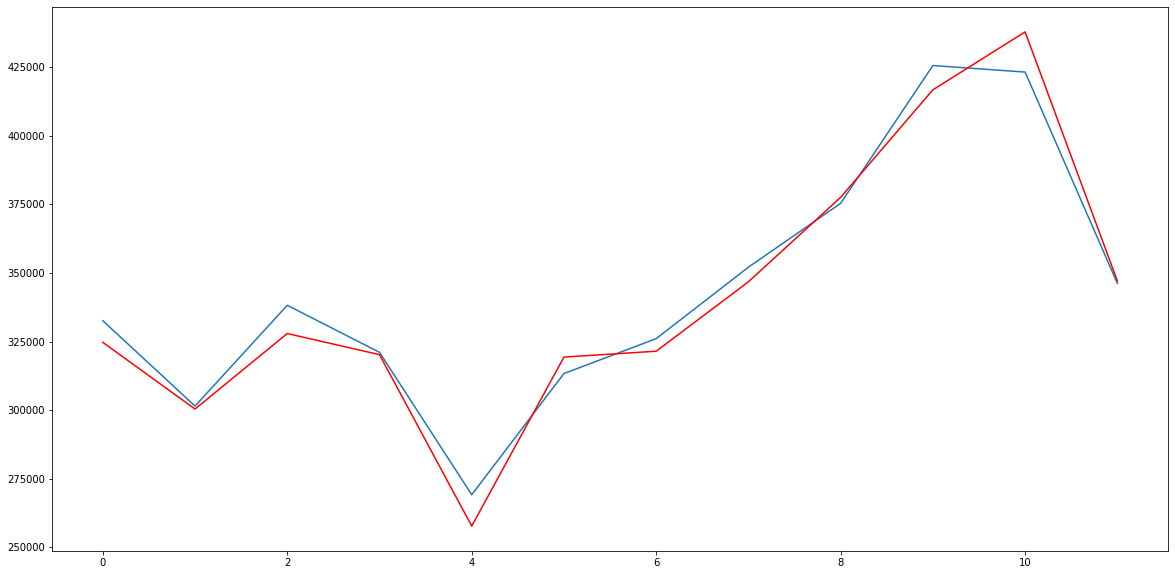

In [36]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# load and prepare datasets
series = read_csv(input_csv1, header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv(input_csv2, header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')

# load model
model_fit = ARIMAResults.load('model_arima.pkl')
bias = numpy.load('model_arima_bias.npy')

# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    percent_diff = (numpy.absolute(yhat - obs) * 100) / yhat
    print('>Predicted=%.3f, Expected=%3.f - Diff=%.2f %%' % (yhat, obs, percent_diff))
    
    
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()